# Churn Analysis and Prediction

## Introduction

Churn or customer attrition is when customers choose to stop using the services of a particular business. 

Churn rate is very important in the telecommunications industry due to the competition between the variety of service providers. Every year companies try to understand trends within their churn rates to limit the probability of the churn by improving customer-business relations. These companies also try to predict when a customer is going to discontinue the service, so they can focus on customer retention marketing for the subset of the population that is most likely to churn.

In this project the demographic of the churn population is explored in context of the whole and logistic regression is used to build a classification model to predict customer attrition. 

In [96]:
#Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import roc_auc_score,roc_curve,scorer
from sklearn.metrics import f1_score
import statsmodels.api as sm
from sklearn.metrics import precision_score,recall_score
from yellowbrick.classifier import DiscriminationThreshold

## Importing data

In [2]:
tc_data= pd.read_csv('churn_data.csv', header=0)
tc_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
#Summary of data
print('Number of Rows: ', tc_data.shape[0])
print('Number of Columns: ', tc_data.shape[1])
print('Number of features: ', tc_data.columns.tolist())
print('Presence of NAs: ', tc_data.isnull().sum().values.sum())
print('Unique values: ', tc_data.nunique())
tc_data.describe()

Number of Rows:  7043
Number of Columns:  21
Number of features:  ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']
Presence of NAs:  0
Unique values:  customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


## Data Cleaning

In [4]:
#Replacing spaces with nas
tc_data['TotalCharges']= tc_data['TotalCharges'].replace(' ', np.nan)
tc= tc_data[tc_data['TotalCharges'].notnull()]
tc.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
#Converting TotalCharges to Float
tc['TotalCharges']=tc['TotalCharges'].astype('float')
tc.head()

/Users/Avnika/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
#Replacing values for internet data
replace_cols= ['OnlineSecurity', 'OnlineBackup', 
               'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
for i in replace_cols:
    tc[i]= tc[i].replace('No internet service', 'No')
print(tc.nunique())

customerID          7032
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                72
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         2
OnlineBackup           2
DeviceProtection       2
TechSupport            2
StreamingTV            2
StreamingMovies        2
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1584
TotalCharges        6530
Churn                  2
dtype: int64


/Users/Avnika/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [7]:
#Converting tenure to categorical values
def tc_cat(ten):
    if (ten['tenure']<=9):
        return 'tenure 0-9'
    elif (ten['tenure']>9) & (ten['tenure']<=29):
        return 'tenure 9-29'
    elif (ten['tenure']>29) & (ten['tenure']<=55):
        return 'tenure 29-55'
    else:
        return 'tenure 55-72'
    
tc['tenure_cat']= tc.apply(lambda tc:tc_cat(tc), axis=1)

tc.head()

/Users/Avnika/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_cat
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,tenure 0-9
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,tenure 29-55
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,tenure 0-9
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,tenure 29-55
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,tenure 0-9


## Exploratory data analysis

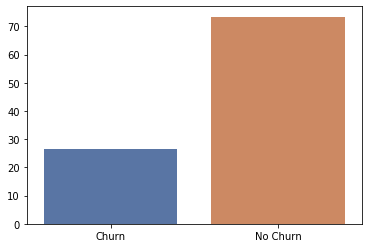

In [8]:
#Percentage of people churned
total= len(tc)
churn= len(tc[tc['Churn']=='Yes'])
p_churn= (churn/total)*100
no_churn= len(tc[tc['Churn']=='No'])
p_no_churn= (no_churn/total)*100

sns.barplot(x=['Churn', 'No Churn'], y=[p_churn, p_no_churn], palette= 'deep')
plt.show()

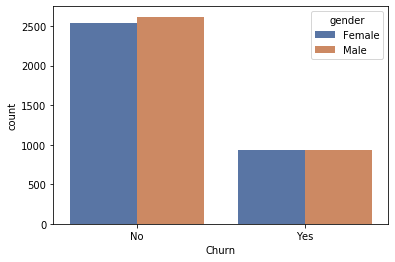

In [9]:
#Gender description of customers
sns.countplot(x='Churn', hue='gender', data=tc, palette='deep')

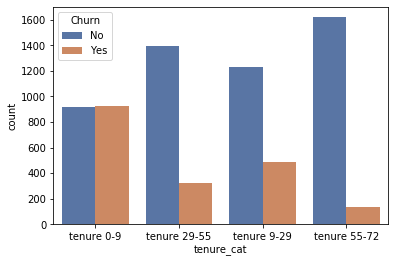

In [10]:
#Tenure description of customers
sns.countplot(x= 'tenure_cat', data=tc, hue= 'Churn', palette='deep')

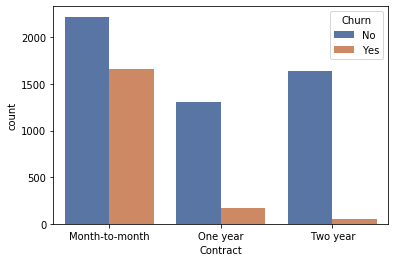

In [11]:
#Contract type
sns.countplot(x= 'Contract', data=tc, hue= 'Churn', palette='deep')

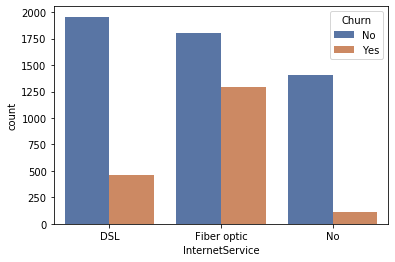

In [12]:
#Internet type
sns.countplot(x= 'InternetService', data=tc, hue= 'Churn', palette='deep')

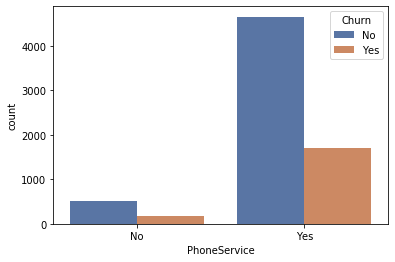

In [13]:
#Phone service
sns.countplot(x= 'PhoneService', data=tc, hue= 'Churn', palette='deep')

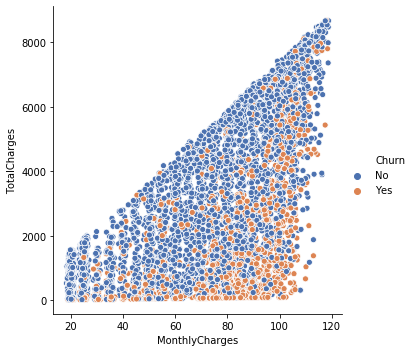

In [14]:
#Scatter plot of monthly charges vs total charges and churn
sns.relplot(x='MonthlyCharges', y='TotalCharges', data= tc, hue= 'Churn', palette='deep')

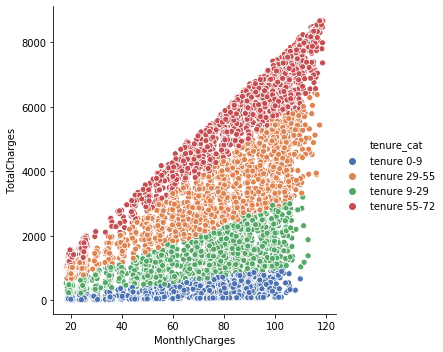

In [15]:
#Scatter plot of monthly charges vs total charges and tenure type
sns.relplot(x='MonthlyCharges', y='TotalCharges', data= tc, hue= 'tenure_cat', palette='deep')

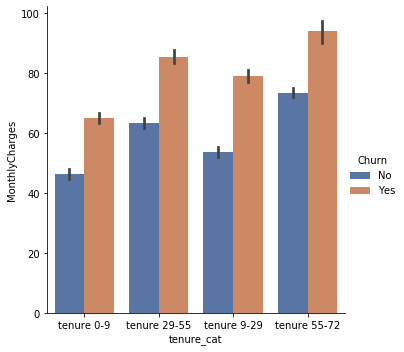

In [16]:
#Tenure type and monthly charges 
sns.catplot(x= 'tenure_cat', y='MonthlyCharges', data= tc, hue= 'Churn',
            palette='deep', kind='bar')

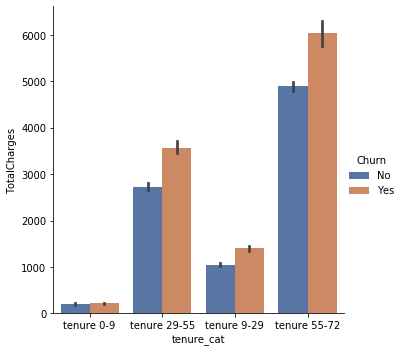

In [17]:
#Tenure type and total charges 
sns.catplot(x= 'tenure_cat', y='TotalCharges', data= tc, hue= 'Churn',
            palette='deep', kind='bar')

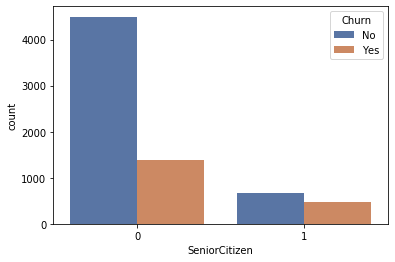

In [18]:
#Senior Citizens
sns.countplot(x= 'SeniorCitizen', data= tc, hue= 'Churn',
            palette='deep')

## Preprocessing for Classification 

In [25]:
#Finding all columns with binary values
binary= tc.columns[tc.nunique()==2].tolist()
le= LabelEncoder()
for i in binary:
    tc[i]= le.fit_transform(tc[i])

#Creating new df with scaled values
id_col= ['customerID']
target= ['Churn']
cats= tc.columns[tc.nunique()<5].tolist()
cats= [i for i in cats if i not in target]
nums= [i for i in tc.columns if i not in id_col+target+cats]
multi= [i for i in cats if i not in binary]


tc_pp= pd.get_dummies(data=tc, columns= multi)
ss= StandardScaler()
for i in nums:
    tc_pp[i]=ss.fit_transform(tc[nums])
tc_pp

/Users/Avnika/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,...,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_cat_tenure 0-9,tenure_cat_tenure 29-55,tenure_cat_tenure 55-72,tenure_cat_tenure 9-29
0,7590-VHVEG,0,0,1,0,-1.280248,0,0,1,0,...,0,0,0,0,1,0,1,0,0,0
1,5575-GNVDE,1,0,0,0,0.064303,1,1,0,1,...,1,0,0,0,0,1,0,1,0,0
2,3668-QPYBK,1,0,0,0,-1.239504,1,1,1,0,...,0,0,0,0,0,1,1,0,0,0
3,7795-CFOCW,1,0,0,0,0.512486,0,1,0,1,...,1,0,1,0,0,0,0,1,0,0
4,9237-HQITU,0,0,0,0,-1.239504,1,0,0,0,...,0,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,1,0,1,1,-0.343137,1,1,0,1,...,1,0,0,0,0,1,0,0,0,1
7039,2234-XADUH,0,0,1,1,1.612573,1,0,1,1,...,1,0,0,1,0,0,0,0,1,0
7040,4801-JZAZL,0,0,1,1,-0.872808,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
7041,8361-LTMKD,1,1,1,0,-1.158016,1,0,0,0,...,0,0,0,0,0,1,1,0,0,0


In [28]:
#Generating summary of the variables
tc_pp.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_cat_tenure 0-9,tenure_cat_tenure 29-55,tenure_cat_tenure 55-72,tenure_cat_tenure 9-29
count,7032.000000,7032.000000,7032.000000,7032.000000,7.032000e+03,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,...,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.504693,0.162400,0.482509,0.298493,-1.214741e-16,0.903299,0.286547,0.344852,0.343857,0.290102,...,0.209329,0.239619,0.219283,0.216297,0.336320,0.228100,0.262088,0.244454,0.249573,0.243885
std,0.500014,0.368844,0.499729,0.457629,1.000071e+00,0.295571,0.452180,0.475354,0.475028,0.453842,...,0.406858,0.426881,0.413790,0.411748,0.472483,0.419637,0.439801,0.429794,0.432797,0.429455
min,0.000000,0.000000,0.000000,0.000000,-1.280248e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,-9.542963e-01,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,-1.394171e-01,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,9.199259e-01,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.612573e+00,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Correlation Plot

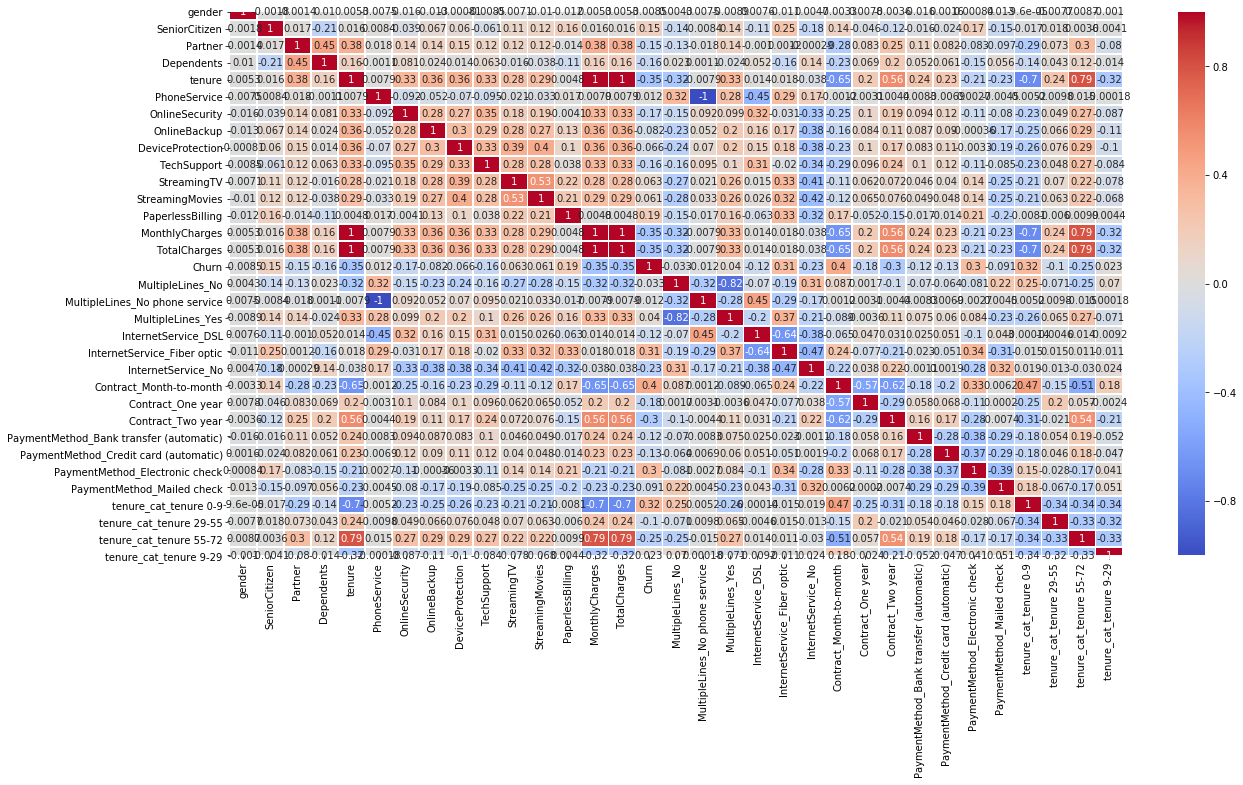

In [29]:
tc_corr= tc_pp.corr()
f, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(tc_corr, annot=True, linewidths=.5, ax=ax, cmap= 'coolwarm')

## PCA Analysis 

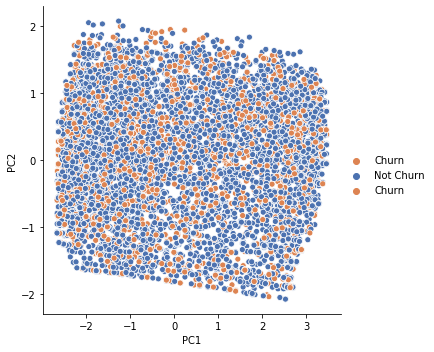

In [33]:
#PCA
pca= PCA(n_components=2)
X = tc_pp[[i for i in tc_pp.columns if i not in id_col + target]]
Y = tc_pp[id_col + target]

principal_components = pca.fit_transform(X)
pca_data = pd.DataFrame(principal_components,columns = ["PC1","PC2"])
pca_data = pca_data.merge(Y,left_index=True,right_index=True,how="left")
pca_data["Churn"] = pca_data["Churn"].replace({1:"Churn",0:"Not Churn"})
pca_data
sns.relplot(x= 'PC1', y='PC2', hue='Churn', data= pca_data, palette='deep')

## Classifier Model Building

In [49]:
#Splitting dataset to train and test
X=tc_pp[[i for i in tc_pp.columns if i not in id_col + target]]
y=tc_pp[target]
cols=[i for i in tc_pp.columns if i not in id_col + target]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = .2 ,random_state = 42)

In [94]:
#Creating function for automatic churn prediction to be implemented with different models
def churn_pred(alg, xtrain, ytrain, xtest, ytest, cols, cf, threshold_plot):
    #model
    alg.fit(xtrain,ytrain)
    predictions   = alg.predict(xtest)
    probabilities = alg.predict_proba(xtest)
    #coeffs
    if   cf == "coefficients" :
        coefficients  = pd.DataFrame(alg.coef_.ravel())
    elif cf == "features" :
        coefficients  = pd.DataFrame(alg.feature_importances_)
        
    column_df     = pd.DataFrame(cols)
    coef_sumry    = (pd.merge(coefficients,column_df,left_index= True,
                              right_index= True, how = "left"))
    coef_sumry.columns = ["coefficients","features"]
    coef_sumry    = coef_sumry.sort_values(by = "coefficients",ascending = False)
    
    print (alg)
    print ("\n Classification report : \n",classification_report(ytest,predictions))
    print ("Accuracy   Score : ",accuracy_score(ytest,predictions))
    #confusion matrix
    conf_matrix = confusion_matrix(ytest,predictions)
    #roc_auc_score
    model_roc_auc = roc_auc_score(ytest,predictions) 
    print ("Area under curve : ",model_roc_auc,"\n")
    fpr,tpr,thresholds = roc_curve(ytest,probabilities[:,1])
    
    fig, ax= plt.subplots(3,1, figsize=(10, 20))
    
    
    #Plotting corr heatmap
    sns.heatmap(conf_matrix, annot=True, ax=ax[0], cmap= 'coolwarm')
    ax[0].set( title='Confusion Matrix')
    #Plotting roc curve
    sns.scatterplot(x= fpr, y= tpr, ax= ax[1])
    sns.scatterplot(x=[0,1], y=[0,1], ax=ax[1])
    ax[1].plot([0,1],[0,1], color= 'red')
    ax[1].set(xlabel='False positive rate', ylabel='True positive rate', title='ROC Curve')
    #Plotting coeffs
    sns.catplot(x='features', y='coefficients', data=coef_sumry, kind='bar', palette='deep', ax= ax[2])
    ax[2].set_xticklabels(labels= coef_sumry['features'],rotation=90)
    ax[2].set(xlabel='Features', ylabel='Coefficients', title='Feature Importance')
    
    if threshold_plot == True : 
        visualizer = DiscriminationThreshold(alg)
        visualizer.fit(X_train,y_train)
        visualizer.poof()
    


/Users/Avnika/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

 Classification report : 
               precision    recall  f1-score   support

           0       0.82      0.91      0.86      1033
           1       0.64      0.47      0.54       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.70      1407
weighted avg       0.77      0.79      0.78      1407

Accuracy   Score :  0.7882018479033405
Area under curve :  0.68518566451486 



/Users/Avnika/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
/Users/Avnika/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/Users/Avnika/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/Avnika/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and wi

/Users/Avnika/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/Users/Avnika/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/Avnika/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/Users/Avnika/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

/Users/Avnika/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/Users/Avnika/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/Avnika/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/Users/Avnika/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

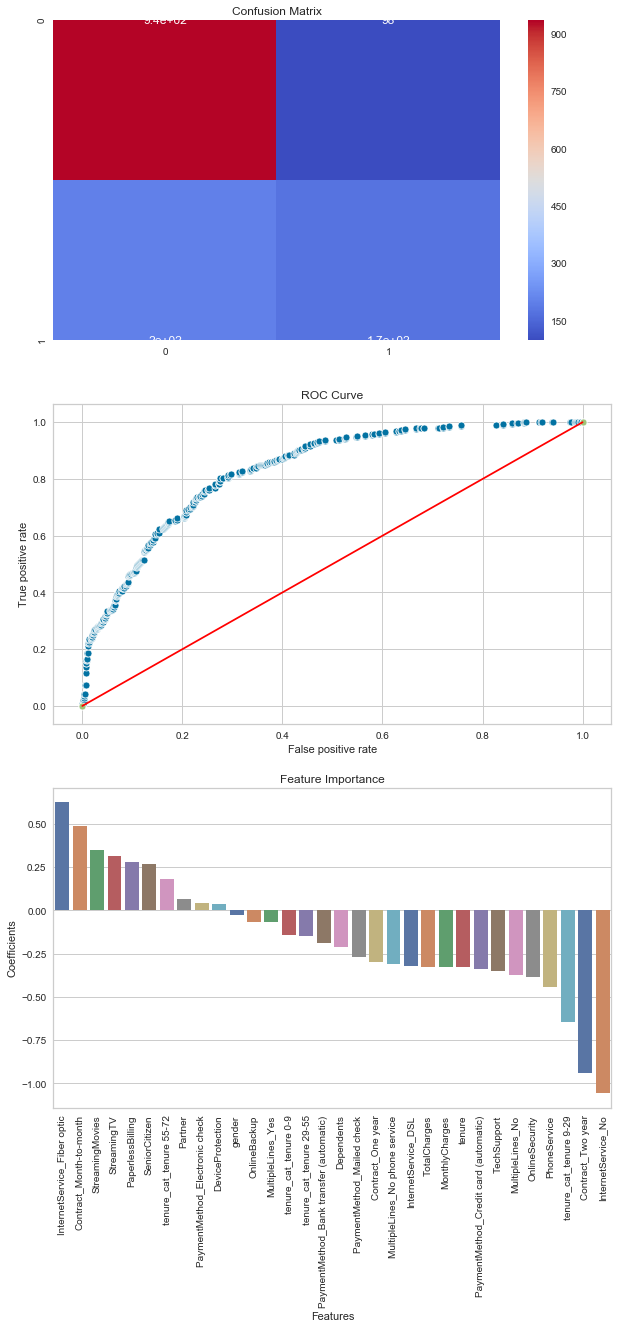

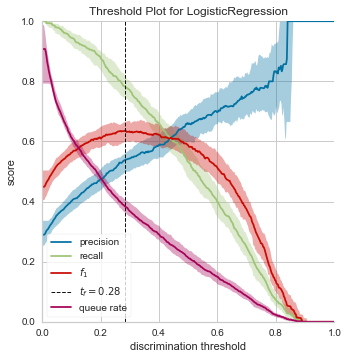

In [95]:
logit  = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

churn_pred(logit,X_train,y_train,X_test,y_test,cols,"coefficients",threshold_plot = True)
    